In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
df = df.drop(["Kidhome","Teenhome"], axis=1)

In [6]:
df.head()

,Year_Birth,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,2,58138.0,663,58,635,88,546,172,88,...,0,1,0,0,0,0,1,0,0,0
1,1954,2,46344.0,113,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,2,71613.0,312,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,2,26646.0,139,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,4,58293.0,161,94,173,43,118,46,27,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# get a list of all columns
columns = df.columns.tolist()

In [8]:
# remove target feature Response from the list
columns.remove("Response")

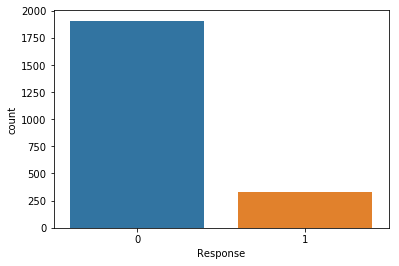

In [9]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [13]:
seed = 0 

In [14]:
%%capture
# transform the df to X_f using the exact ratio of 0 and 1: 17%
X_f = preprocessing.centroid_undersampling(X=df, f=0.17)

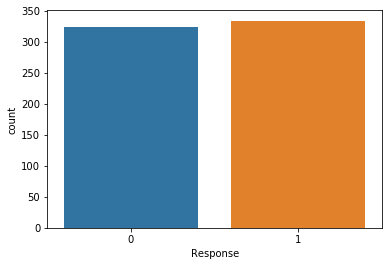

In [15]:
# now the dataset is balanced
countplot(x="Response", data=X_f)

In [16]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(X_f, test_size=0.2, random_state=seed)

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(6, activation="relu", input_dim=30))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [22]:
model.fit(X_train, y_train, epochs=100)
y_predicted = model.predict(X_test)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
526/526 [==============================] - 0s 806us/step - loss: 0.6878 - acc: 0.5989
Epoch 2/100
526/526 [==============================] - 0s 44us/step - loss: 0.6853 - acc: 0.5970
Epoch 3/100
526/526 [==============================] - 0s 37us/step - loss: 0.6823 - acc: 0.6160
Epoch 4/100
526/526 [==============================] - 0s 34us/step - loss: 0.6784 - acc: 0.6255
Epoch 5/100
526/526 [==============================] - 0s 36us/step - loss: 0.6740 - acc: 0.6312
Epoch 6/100
526/526 [==============================] - 0s 36us/step - loss: 0.6687 - acc: 0.6445
Epoch 7/100
526/526 [==============================] - 0s 37us/step - loss: 0.6633 - acc: 0.6540
Epoch 8/100
526/526 [==============================] - 0s 35us/step - loss: 0.6576 - acc: 0.6692
Epoch 9/100
526/526 [==============================] - 0s 35us/step - loss: 0.6508 - acc: 0.6787
Epoch 10/100
526/526 [==============================] - 0s 35us/step - loss: 0

526/526 [==============================] - 0s 35us/step - loss: 0.3810 - acc: 0.8137
Epoch 83/100
526/526 [==============================] - 0s 32us/step - loss: 0.3807 - acc: 0.8118
Epoch 84/100
526/526 [==============================] - 0s 34us/step - loss: 0.3798 - acc: 0.8194
Epoch 85/100
526/526 [==============================] - 0s 30us/step - loss: 0.3798 - acc: 0.8137
Epoch 86/100
526/526 [==============================] - 0s 33us/step - loss: 0.3786 - acc: 0.8061
Epoch 87/100
526/526 [==============================] - 0s 33us/step - loss: 0.3796 - acc: 0.8175
Epoch 88/100
526/526 [==============================] - 0s 35us/step - loss: 0.3788 - acc: 0.8137
Epoch 89/100
526/526 [==============================] - 0s 33us/step - loss: 0.3777 - acc: 0.8156
Epoch 90/100
526/526 [==============================] - 0s 32us/step - loss: 0.3782 - acc: 0.8156
Epoch 91/100
526/526 [==============================] - 0s 33us/step - loss: 0.3752 - acc: 0.8137
Epoch 92/100
526/526 [===========

In [23]:
model.evaluate(X_test, y_test)

132/132 [==============================] - 0s 475us/step


[0.4372568004059069, 0.8181818181818182]

In [24]:
y_pred = []
for i in y_predicted:
    if i < 0.5:
        i=0
        y_pred.append(i)
    else:
        i=1
        y_pred.append(i)

Normalized confusion matrix
[[0.75362319 0.24637681]
 [0.11111111 0.88888889]]


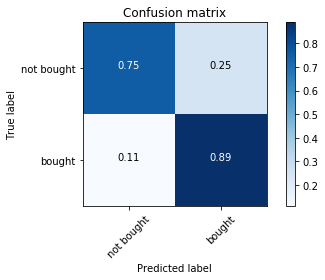

In [25]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [29]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.82
Area under the curve 0.82
Precision 0.89
Recall 0.77
Profit Share 0.73


In [36]:
seeds=[0,1,2,3,4]
average_profit_share = 0
sum_profit_share = 0

for seed in range(5):
    
    x = utils.profit_share(y_pred, y_test)
    sum_profit_share = sum_profit_share + x

    

0
1
2
3
4


0.73

In [18]:
from keras import models
from keras import layers
from sklearn.preprocessing import MinMaxScaler

sum_profit_share = 0

for i in range(5):

    #%%capture
    # transform the df to X_f using the exact ratio of 0 and 1: 17%
    X_f = preprocessing.centroid_undersampling(X=df, f=0.17)

    # now the dataset is balanced
    #countplot(x="Response", data=X_f)

    # perform the train, test split
    X_train, X_test, y_train, y_test = utils.data_split(X_f, test_size=0.2, random_state=i)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = models.Sequential()
    model.add(layers.Dense(6, activation="relu", input_dim=30))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

    model.fit(X_train, y_train, epochs=100)
    y_predicted = model.predict(X_test)

    y_pred = []
    for i in y_predicted:
        if i < 0.5:
            i=0
            y_pred.append(i)
        else:
            i=1
            y_pred.append(i)
            
    x = utils.profit_share(y_pred, y_test)
    sum_profit_share = sum_profit_share + x

average_profit_share = (sum_profit_share/len(range(5)))

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_label["distance"] = 0
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Epoch 1/100
526/526 [==============================] - 0s 507us/step - loss: 0.6885 - acc: 0.5057
Epoch 2/100
526/526 [==============================] - 0s 35us/step - loss: 0.6831 - acc: 0.5171
Epoch 3/100
526/526 [==============================] - 0s 37us/step - loss: 0.6786 - acc: 0.5209
Epoch 4/100
526/526 [==============================] - 0s 44us/step - loss: 0.6740 - acc: 0.5304
Epoch 5/100
526/526 [==============================] - 0s 38us/step - loss: 0.6694 - acc: 0.5342
Epoch 6/100
526/526 [==============================] - 0s 36us/step - loss: 0.6635 - acc: 0.5513
Epoch 7/100
526/526 [==============================] - 0s 34us/step - loss: 0.6576 - acc: 0.5817
Epoch 8/100
526/526 [==============================] - 0s 34us/step - loss: 0.6508 - acc: 0.6065
Epoch 9/100
526/526 [==============================] - 0s 35us/step - loss: 0.6433 - acc: 0.6179
Epoch 10/100
526/526 [==============================] - 0s 32us/step - loss: 0.6362 - acc: 0.6274
Epoch 11/100
526/526 [======

526/526 [==============================] - 0s 34us/step - loss: 0.3564 - acc: 0.8498
Epoch 85/100
526/526 [==============================] - 0s 36us/step - loss: 0.3570 - acc: 0.8479
Epoch 86/100
526/526 [==============================] - 0s 41us/step - loss: 0.3549 - acc: 0.8460
Epoch 87/100
526/526 [==============================] - 0s 37us/step - loss: 0.3565 - acc: 0.8479
Epoch 88/100
526/526 [==============================] - 0s 35us/step - loss: 0.3536 - acc: 0.8536
Epoch 89/100
526/526 [==============================] - 0s 36us/step - loss: 0.3530 - acc: 0.8479
Epoch 90/100
526/526 [==============================] - 0s 36us/step - loss: 0.3551 - acc: 0.8479
Epoch 91/100
526/526 [==============================] - 0s 36us/step - loss: 0.3515 - acc: 0.8498
Epoch 92/100
526/526 [==============================] - 0s 37us/step - loss: 0.3524 - acc: 0.8498
Epoch 93/100
526/526 [==============================] - 0s 35us/step - loss: 0.3520 - acc: 0.8536
Epoch 94/100
526/526 [===========

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_label["distance"] = 0
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Epoch 1/100
526/526 [==============================] - 0s 565us/step - loss: 0.6802 - acc: 0.5837
Epoch 2/100
526/526 [==============================] - 0s 30us/step - loss: 0.6735 - acc: 0.5875
Epoch 3/100
526/526 [==============================] - 0s 31us/step - loss: 0.6675 - acc: 0.6331
Epoch 4/100
526/526 [==============================] - 0s 31us/step - loss: 0.6609 - acc: 0.6540
Epoch 5/100
526/526 [==============================] - 0s 31us/step - loss: 0.6539 - acc: 0.6730
Epoch 6/100
526/526 [==============================] - 0s 37us/step - loss: 0.6460 - acc: 0.6787
Epoch 7/100
526/526 [==============================] - 0s 32us/step - loss: 0.6382 - acc: 0.7148
Epoch 8/100
526/526 [==============================] - 0s 30us/step - loss: 0.6301 - acc: 0.7148
Epoch 9/100
526/526 [==============================] - 0s 32us/step - loss: 0.6217 - acc: 0.7376
Epoch 10/100
526/526 [==============================] - 0s 31us/step - loss: 0.6127 - acc: 0.7471
Epoch 11/100
526/526 [======

526/526 [==============================] - 0s 35us/step - loss: 0.3777 - acc: 0.8384
Epoch 85/100
526/526 [==============================] - 0s 34us/step - loss: 0.3772 - acc: 0.8403
Epoch 86/100
526/526 [==============================] - 0s 33us/step - loss: 0.3764 - acc: 0.8346
Epoch 87/100
526/526 [==============================] - 0s 32us/step - loss: 0.3781 - acc: 0.8384
Epoch 88/100
526/526 [==============================] - 0s 32us/step - loss: 0.3756 - acc: 0.8422
Epoch 89/100
526/526 [==============================] - 0s 32us/step - loss: 0.3747 - acc: 0.8384
Epoch 90/100
526/526 [==============================] - 0s 32us/step - loss: 0.3715 - acc: 0.8422
Epoch 91/100
526/526 [==============================] - 0s 34us/step - loss: 0.3721 - acc: 0.8327
Epoch 92/100
526/526 [==============================] - 0s 33us/step - loss: 0.3718 - acc: 0.8384
Epoch 93/100
526/526 [==============================] - 0s 34us/step - loss: 0.3703 - acc: 0.8384
Epoch 94/100
526/526 [===========

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_label["distance"] = 0
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Epoch 1/100
526/526 [==============================] - 0s 614us/step - loss: 0.7004 - acc: 0.5076
Epoch 2/100
526/526 [==============================] - 0s 28us/step - loss: 0.6963 - acc: 0.5209
Epoch 3/100
526/526 [==============================] - 0s 29us/step - loss: 0.6940 - acc: 0.5247
Epoch 4/100
526/526 [==============================] - 0s 28us/step - loss: 0.6924 - acc: 0.5228
Epoch 5/100
526/526 [==============================] - 0s 29us/step - loss: 0.6907 - acc: 0.5342
Epoch 6/100
526/526 [==============================] - 0s 31us/step - loss: 0.6892 - acc: 0.5418
Epoch 7/100
526/526 [==============================] - 0s 29us/step - loss: 0.6874 - acc: 0.5589
Epoch 8/100
526/526 [==============================] - 0s 28us/step - loss: 0.6856 - acc: 0.5817
Epoch 9/100
526/526 [==============================] - 0s 28us/step - loss: 0.6832 - acc: 0.5951
Epoch 10/100
526/526 [==============================] - 0s 28us/step - loss: 0.6806 - acc: 0.6141
Epoch 11/100
526/526 [======

526/526 [==============================] - 0s 28us/step - loss: 0.3407 - acc: 0.8498
Epoch 85/100
526/526 [==============================] - 0s 28us/step - loss: 0.3372 - acc: 0.8536
Epoch 86/100
526/526 [==============================] - 0s 29us/step - loss: 0.3398 - acc: 0.8555
Epoch 87/100
526/526 [==============================] - 0s 29us/step - loss: 0.3373 - acc: 0.8612
Epoch 88/100
526/526 [==============================] - 0s 28us/step - loss: 0.3360 - acc: 0.8536
Epoch 89/100
526/526 [==============================] - 0s 31us/step - loss: 0.3344 - acc: 0.8612
Epoch 90/100
526/526 [==============================] - 0s 29us/step - loss: 0.3340 - acc: 0.8612
Epoch 91/100
526/526 [==============================] - 0s 28us/step - loss: 0.3313 - acc: 0.8593
Epoch 92/100
526/526 [==============================] - 0s 28us/step - loss: 0.3321 - acc: 0.8574
Epoch 93/100
526/526 [==============================] - 0s 28us/step - loss: 0.3296 - acc: 0.8612
Epoch 94/100
526/526 [===========

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_label["distance"] = 0
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Epoch 1/100
526/526 [==============================] - 0s 763us/step - loss: 0.6922 - acc: 0.4943
Epoch 2/100
526/526 [==============================] - 0s 36us/step - loss: 0.6816 - acc: 0.5323
Epoch 3/100
526/526 [==============================] - 0s 33us/step - loss: 0.6760 - acc: 0.5817
Epoch 4/100
526/526 [==============================] - 0s 32us/step - loss: 0.6709 - acc: 0.6141
Epoch 5/100
526/526 [==============================] - 0s 32us/step - loss: 0.6645 - acc: 0.6312
Epoch 6/100
526/526 [==============================] - 0s 33us/step - loss: 0.6559 - acc: 0.6673
Epoch 7/100
526/526 [==============================] - 0s 34us/step - loss: 0.6468 - acc: 0.6844
Epoch 8/100
526/526 [==============================] - 0s 32us/step - loss: 0.6374 - acc: 0.6977
Epoch 9/100
526/526 [==============================] - 0s 32us/step - loss: 0.6276 - acc: 0.7148
Epoch 10/100
526/526 [==============================] - 0s 35us/step - loss: 0.6164 - acc: 0.7281
Epoch 11/100
526/526 [======

526/526 [==============================] - 0s 35us/step - loss: 0.3287 - acc: 0.8612
Epoch 85/100
526/526 [==============================] - 0s 34us/step - loss: 0.3267 - acc: 0.8650
Epoch 86/100
526/526 [==============================] - 0s 37us/step - loss: 0.3259 - acc: 0.8593
Epoch 87/100
526/526 [==============================] - 0s 36us/step - loss: 0.3258 - acc: 0.8574
Epoch 88/100
526/526 [==============================] - 0s 35us/step - loss: 0.3235 - acc: 0.8650
Epoch 89/100
526/526 [==============================] - 0s 35us/step - loss: 0.3246 - acc: 0.8593
Epoch 90/100
526/526 [==============================] - 0s 35us/step - loss: 0.3221 - acc: 0.8612
Epoch 91/100
526/526 [==============================] - 0s 35us/step - loss: 0.3234 - acc: 0.8593
Epoch 92/100
526/526 [==============================] - 0s 35us/step - loss: 0.3202 - acc: 0.8650
Epoch 93/100
526/526 [==============================] - 0s 35us/step - loss: 0.3212 - acc: 0.8593
Epoch 94/100
526/526 [===========

/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_label["distance"] = 0
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jovyan/work/2_Semester/Machine Learning/MLProjects/Proposal/preprocessing.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Epoch 1/100
526/526 [==============================] - 0s 770us/step - loss: 0.6949 - acc: 0.5418
Epoch 2/100
526/526 [==============================] - 0s 29us/step - loss: 0.6912 - acc: 0.5494
Epoch 3/100
526/526 [==============================] - 0s 29us/step - loss: 0.6887 - acc: 0.5722
Epoch 4/100
526/526 [==============================] - 0s 28us/step - loss: 0.6867 - acc: 0.5798
Epoch 5/100
526/526 [==============================] - 0s 30us/step - loss: 0.6844 - acc: 0.5913
Epoch 6/100
526/526 [==============================] - 0s 29us/step - loss: 0.6810 - acc: 0.6160
Epoch 7/100
526/526 [==============================] - 0s 28us/step - loss: 0.6768 - acc: 0.6350
Epoch 8/100
526/526 [==============================] - 0s 28us/step - loss: 0.6712 - acc: 0.6692
Epoch 9/100
526/526 [==============================] - 0s 29us/step - loss: 0.6649 - acc: 0.6825
Epoch 10/100
526/526 [==============================] - 0s 29us/step - loss: 0.6579 - acc: 0.7015
Epoch 11/100
526/526 [======

526/526 [==============================] - 0s 32us/step - loss: 0.3635 - acc: 0.8517
Epoch 85/100
526/526 [==============================] - 0s 30us/step - loss: 0.3634 - acc: 0.8403
Epoch 86/100
526/526 [==============================] - 0s 29us/step - loss: 0.3629 - acc: 0.8479
Epoch 87/100
526/526 [==============================] - 0s 29us/step - loss: 0.3634 - acc: 0.8479
Epoch 88/100
526/526 [==============================] - 0s 29us/step - loss: 0.3619 - acc: 0.8479
Epoch 89/100
526/526 [==============================] - 0s 29us/step - loss: 0.3631 - acc: 0.8460
Epoch 90/100
526/526 [==============================] - 0s 30us/step - loss: 0.3608 - acc: 0.8498
Epoch 91/100
526/526 [==============================] - 0s 29us/step - loss: 0.3601 - acc: 0.8422
Epoch 92/100
526/526 [==============================] - 0s 30us/step - loss: 0.3610 - acc: 0.8460
Epoch 93/100
526/526 [==============================] - 0s 29us/step - loss: 0.3596 - acc: 0.8460
Epoch 94/100
526/526 [===========

In [19]:
average_profit_share

0.736